<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head(2)

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,False,Feb,Returning_Customer,0.0


## What are the purchase rates for online shopping sessions by customer type for November and December?

In [13]:
# Filter data to include only November and December sessions
nov_dec_data = shopping_data[shopping_data['Month'].isin(['Nov','Dec'])]

# Calculate purchase rates by customer type
purchase_rates = nov_dec_data.groupby(['CustomerType'])['Purchase'].mean().to_dict()

print(purchase_rates)

{'New_Customer': 0.2733516483516483, 'Returning_Customer': 0.1955937667920473}


## What is the strongest correlation in total time spent among page types by returning customers in November and December? 

In [14]:
# Filter data to include only returning customers in November and December
nov_dec_returning_data = shopping_data[(shopping_data['Month'].isin(['Nov','Dec'])) & (shopping_data['CustomerType'] == 'Returning_Customer')]

# Calculate correlations between page types for returning customers in November and December
correlations = nov_dec_returning_data[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].corr()

# Find the strongest correlation
correlation_stack = correlations.stack()
correlation_stack = correlation_stack[correlation_stack < 1]  # Exclude self-correlation
top_correlation_pair = correlation_stack.sort_values(ascending=False).index[0]
top_correlation_value = correlation_stack.sort_values(ascending=False).values[0]

top_correlation = {"pair": top_correlation_pair, "correlation": top_correlation_value}
print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.41689293883422823}


## What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers?

In [15]:
# calculate new purchace rate for returning customers
p = 0.1955937667920473 * 1.15

# number of sessions
n = 500

# Calculate the probability of at least 100 sales
prob_at_least_100_sales = 1 - stats.binom.cdf(100 - 1, n, p)

print(prob_at_least_100_sales)

0.9190464150313482


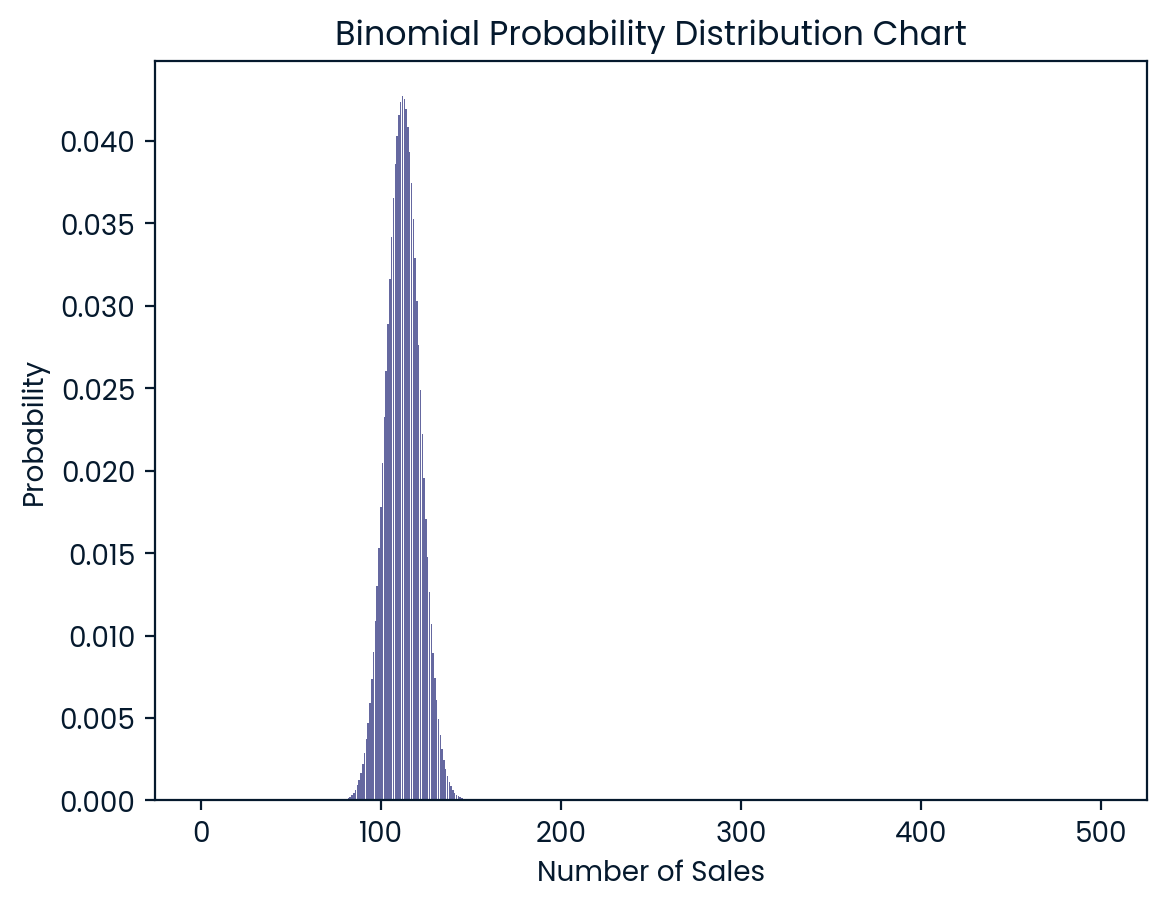

In [16]:
# Create the plot
# Calculate the probabilities for all possible outcomes
x = np.arange(n+1)
y = stats.binom.pmf(x, n, p)

# Plot the results
plt.bar(x, y)
plt.xlabel('Number of Sales')
plt.ylabel('Probability')
plt.title('Binomial Probability Distribution Chart')

plt.show()